Yalidt Díaz 141394

Practica 2 : Aproximación de Derivadas e Integrales

Ejemplo:
Aproximemos a la función $\frac{1}{x}$ en el intervalo $[1,2]$ con polinomios de Taylor de orden $n$ con $n \in \{0,1,2\}$ con centro en $x_0=1.5$. Los polinomios de Taylor son:
$$P_0(x) = f(x_0) = \frac{2}{3} \quad \text{(constante)}$$
$$P_1(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) \quad \text{(lineal)}$$
$$P_2(x) = f(x_0) + f^{(1)}(x_0)(x-x_0) + \frac{f^{(2)}(x_0)(x-x_0)^2}{2} = \frac{2}{3} - \frac{1}{x_0^2}(x-x_0) + \frac{2}{x_0^3}(x-x_0)^2 \quad \text{(cuadrático)}$$


In [13]:
#Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange

In [14]:
#Definir el rango que abarcará la función y sus incrementos
x=np.arange(1,2,.001)

In [15]:
#Nos indica el número de arreglos en x
x.shape

(1000,)

In [16]:
#La función 2/3 necesita un vector n de UNOS para poder graficarse
np.ones(3)
#n, devuelve la tupla de los arreglos definidos

array([1., 1., 1.])

In [17]:
#Definicion de funciones
def func(x):
    return 1/x
def pcte(x):
    n,=x.shape
    aux = 2/3*np.ones(n)    #Para que se pueda graficar en todos los puntos(es la multiplicacion de unos por 2/3)
    return aux
def polin_1(x,x0):
    return 2/3-(1/((x)**2))*(x-x0)
def polin_2(x,x0):
    return 2/3-(1/((x)**2))*(x-x0)+2/((x)**3)*((x-x0)**2)
x0=1.5

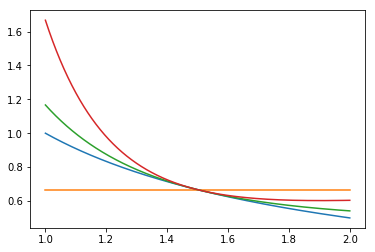

In [18]:
plt.plot(x,func(x))
plt.plot(x,pcte(x))
plt.plot(x,polin_1(x,x0))
plt.plot(x,polin_2(x,x0))

In [ ]:
#¿Cual es la aproximación de los polinomios en x=1.9

In [35]:
x= 1.9
x0= 1.5
aprox_polin_1=polin_1(x,x0)
aprox_polin_2=polin_2(x,x0)
print("Polinomio_1(x)",aprox_polin_1)
print("Polinomio_2(x)",aprox_polin_2)

Polinomio_1(x) 0.5558633425669437
Polinomio_2(x) 0.602517373766827


Ejercicio: realizar una gráfica de log(error relativo) vs log(h) (h en el eje horizontal) para aproximar la segunda derivada de $f(x)=e^{-x}$ en $x=1$ con $h \in \{10^{-16}, 10^{-14}, \dots , 10^{-1}\}$ y diferencias hacia delante. Valor a aproximar: $f^{(2)}(1) = e^{-1}$. Usar:
$$\frac{d^2f(x)}{dx} \approx \frac{f(x+2h)-2f(x+h)+f(x)}{h^2}$$

In [71]:
#Importamos librerias
import Derivada
import numpy as np
import matplotlib.pyplot as plt
import math

In [91]:
#Definición de funciones
f=lambda x: np.exp(-x)
x=1
aux2=np.arange(-16,0,1)  #La dimensión y sus incrementos
print(aux2)
h=np.power(10.0,aux2)  #Para generar el 10^-16...
print(h)

[-16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1]
[1.e-16 1.e-15 1.e-14 1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07
 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]


In [92]:
f_objetivo=math.exp(-1)    #Evaluación de la función en -1
df_objetivo=-math.exp(x)    #La primera derivada de la función

In [93]:
#Definimos los errores 
def error_relativo(p,p_ast):
    return np.abs(p-p_ast)/math.fabs(p_ast)

In [94]:
Derivada.aprox_derivada_hacia_adelante(f,.19,.0001)  #Ejemplo del calculo de la derivada

-0.826917787364323

In [95]:
df_aprox=Derivada.aprox_derivada_hacia_adelante(f,x,h)
ddf_aprox=Derivada.aprox_2a_derivada_hacia_delante(f,x,h)
err_df=error_relativo(df_aprox,df_objetivo)
err_ddf=error_relativo(ddf_aprox,df_objetivo)

In [96]:
err_df

array([1.        , 0.83662871, 0.86521869, 0.86481026, 0.86464689,
       0.86466527, 0.86466465, 0.86466469, 0.86466472, 0.86466472,
       0.86466478, 0.86466539, 0.86467148, 0.86473236, 0.86533914,
       0.87121145])

In [97]:
err_ddf

array([4.08428226e+15, 6.12642339e+13, 2.04214113e+11, 4.08428226e+09,
       4.08428236e+07, 2.04213113e+05, 1.00000000e+00, 4.18428226e+01,
       7.95785887e-01, 1.13886560e+00, 1.13531227e+00, 1.13533412e+00,
       1.13532175e+00, 1.13520003e+00, 1.13398979e+00, 1.12255851e+00])

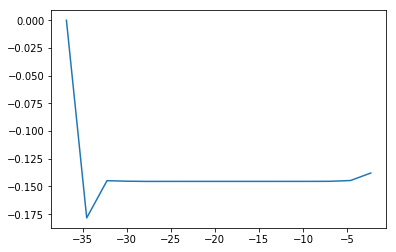

In [98]:
plt.plot(np.log(h),np.log(err_df))

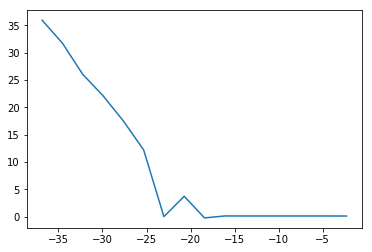

In [99]:
plt.plot(np.log(h),np.log(err_ddf))

In [102]:
err_df.min()

0.8366287096500916

In [101]:
err_ddf.min()

0.7957858870626144

Ejercicio: aproximar el valor de la integral $\displaystyle \int_0^{\pi}sin(x)dx = 2$ con reglas compuestas del rectángulo y trapecio con un número de subintervalos $n \in \{1,10,20,30,40 \}$ y hacer gráfica de la forma error relativo vs $n$ ($n$ en el eje horizontal)

*Seccion 6.3 del libro 

In [7]:
#Importamos las librerias
import scipy.integrate as integrate
import numpy as np
from numpy import sin
from Trapezio import *
import math

In [12]:
#Definicion de Funciones
from Trapezio import *
def f(x): return sin(x);
Iold = 0.0
for k in range(1,40):
    Inew = trapeziod(f,0.0,math.pi,Iold,k)  #utilizamos la funcion definida en el modulo.
    if (k>1) and abs(Inew-Iold)<1.0e-6:break
    Iold = Inew

In [13]:
import matplotlib.pyplot as plt
print("Integral trapezio",Inew)

Integral trapezio 1.9999999019542685
